In [8]:
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import data_frame
import matplotlib.pyplot as plt
import xgboost as xgb
from data_frame import DataFrame, MaxFiller
from metrics import redshift_error
from sklearn.metrics import mean_squared_error, r2_score
from plotting_functions import plot_rmag_vs_metric

import importlib

ImportError: cannot import name 'plot_rmag_vs_metric' from 'plotting_functions' (/home/kdrabicki/projekt/notebooks/../plotting_functions.py)

In [7]:
filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"

In [3]:
importlib.reload(data_frame)
df = DataFrame(filePath, "QSO", filler=MaxFiller())
df.data = df.data.dropna()
X_train, y_train = df.data[df.features], df.data["Z"]
df = df.data[df.features + ["Z"]]

In [4]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [5]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
redshift_err = redshift_error(y_train, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2*100:.0f}%")
print(f"Redshift error: {redshift_err[0]:.2f} +/- {redshift_err[1]:.2f}")

MSE: 0.09
R^2: 84%
Redshift error: 0.01 +/- 0.13


/home/kdrabicki/projekt/plotting_functions.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_label, group in df.groupby('MAG_bin'):


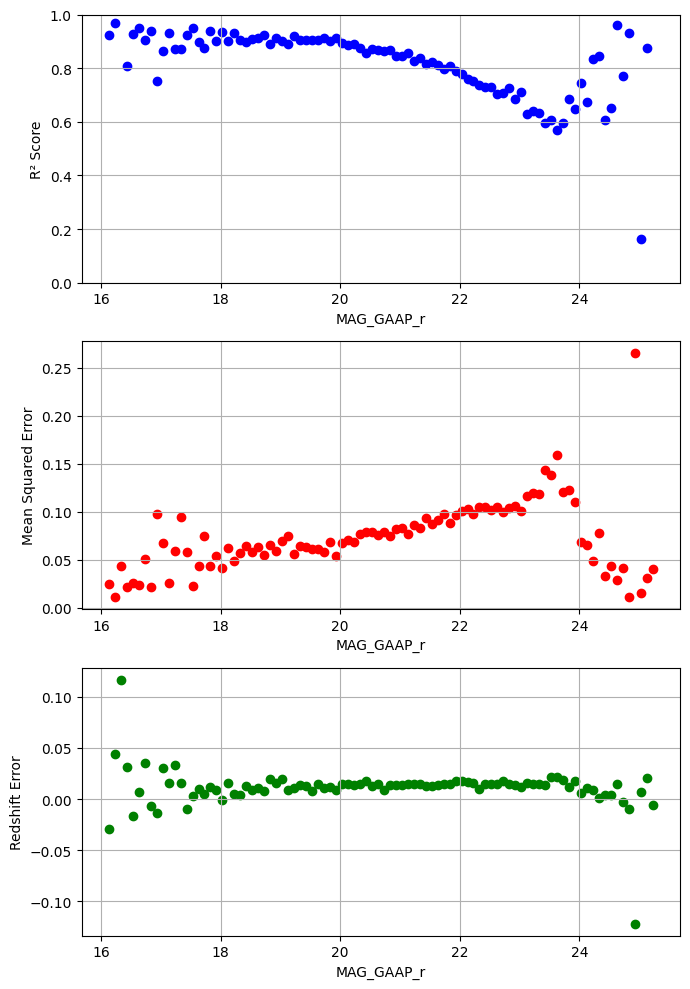

In [6]:
plot_rmag_vs_metric(df, model)

In [11]:
importlib.reload(data_frame)
df = DataFrame(filePath, "GALAXY", filler=MaxFiller())
X_train, y_train = df.data[df.features], df.data["Z"]
df = df.data[df.features + ["Z"]]

/home/kdrabicki/projekt/data_frame.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  if process:


In [23]:
df[df["MAG_GAAP_r"] > 25]

,MAG_GAAP_u,MAG_GAAP_g,MAG_GAAP_r,MAG_GAAP_i1,MAG_GAAP_i2,MAG_GAAP_Z,MAG_GAAP_Y,MAG_GAAP_J,MAG_GAAP_H,MAG_GAAP_Ks,...,Z-J,Z-H,Z-Ks,Y-J,Y-H,Y-Ks,J-H,J-Ks,H-Ks,Z
5392,25.849642,26.602072,25.408295,22.788668,22.441153,20.920452,20.449062,20.194057,19.660755,19.207859,...,0.726395,1.259697,1.712593,0.255005,0.788307,1.241203,0.533302,0.986198,0.452896,0.937608
7809,23.904972,24.129463,25.436081,24.011305,24.353056,22.292376,21.706003,21.939383,22.954672,21.913380,...,0.352993,-0.662296,0.378996,-0.233379,-1.248669,-0.207376,-1.015289,0.026003,1.041292,1.027585
11652,24.313776,24.378164,25.059071,22.909340,22.550478,20.813993,20.344898,19.962105,19.592201,18.987860,...,0.851889,1.221792,1.826134,0.382793,0.752697,1.357038,0.369904,0.974245,0.604342,0.988270
18941,24.692867,24.093168,25.446890,24.519743,23.999399,23.493172,22.614685,23.195444,22.627182,23.545700,...,0.297728,0.865990,-0.052528,-0.580759,-0.012497,-0.931015,0.568262,-0.350256,-0.918518,0.800287
32354,23.964670,23.803078,25.316530,25.820089,24.107401,22.672039,24.074209,25.515652,22.725166,22.300714,...,-2.843613,-0.053127,0.371325,-1.441442,1.349043,1.773495,2.790485,3.214937,0.424452,0.764852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621114,25.849642,24.680603,25.601961,21.799789,21.895287,20.629318,20.238127,19.958521,19.495062,19.070192,...,0.670797,1.134256,1.559126,0.279606,0.743065,1.167934,0.463459,0.888329,0.424870,0.780052
2631064,23.348295,23.239069,25.210258,22.996099,22.427868,30.210012,35.063728,31.180265,33.073498,34.507412,...,-0.970253,-2.863485,-4.297400,3.883463,1.990231,0.556316,-1.893232,-3.327147,-1.433914,1.115842
2640272,25.849642,23.925890,25.852150,23.567511,23.379137,23.344215,22.535780,21.941628,33.073498,23.649685,...,1.402588,-9.729282,-0.305470,0.594152,-10.537718,-1.113905,-11.131870,-1.708057,9.423813,1.118753
2644506,23.860886,24.021683,25.668604,25.820089,25.124693,23.261106,26.960676,23.277266,22.142111,22.271568,...,-0.016159,1.118996,0.989538,3.683411,4.818565,4.689108,1.135155,1.005697,-0.129457,1.349897
